### Check the lakes in the HMA region.

In [ ]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_hma_region_lake = 'data/water-extent/lakes/HydroLakes_v10_hma_region.gpkg'
path_hma_region_lake_stats = 'data/water-extent/lakes/HydroLakes_v10_hma_region_stats.gpkg'


In [64]:
### read in data
hma_gdf = gpd.read_file(path_hma_gtng)
hma_lakes = gpd.read_file(path_hma_region_lake)
hma_region_lake_stats = gpd.read_file(path_hma_region_lake_stats)
hma_lakes.head(2)


,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
0,131,Alakol,Kazakhstan,Asia,SWBD,1,0,2919.34,567.40,2.96,...,1,22.1,55.947,13347.0,347,-1.0,63248.1,81.672917,46.152083,"POLYGON ((81.54844 46.50765, 81.55058 46.50721..."
1,136,Issyk Kul,Kyrgyzstan,Asia,SWBD,1,0,6195.93,608.84,2.18,...,1,280.5,72.678,276778.9,1601,-1.0,21917.0,77.427083,42.485417,"POLYGON ((78.21662 42.7446, 78.21667 42.7421, ..."


Text(0.5, 1.0, 'Distribution of lakes')

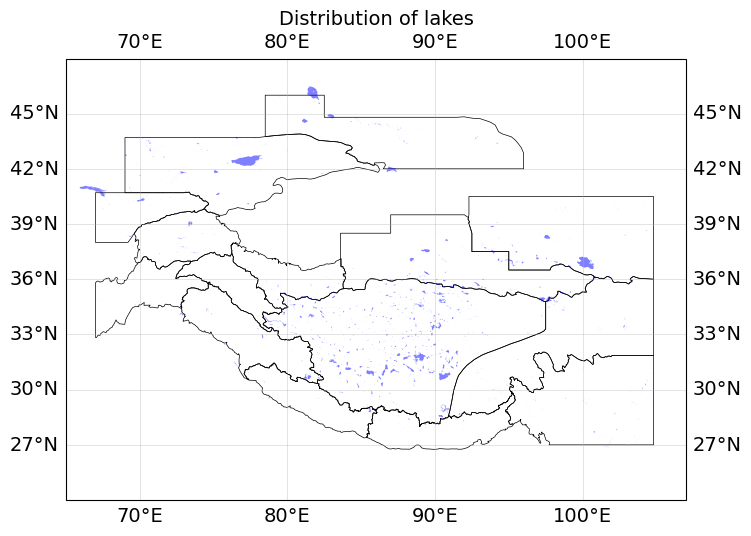

In [65]:
## Lakes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gdf.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
hma_lakes.plot(ax=ax, edgecolor='none', facecolor='blue', linewidth=0.5, alpha=0.5)
ax.set_title('Distribution of lakes', fontsize=14)
# plt.savefig('figures/water-extent/hma_region_lake_map.png', bbox_inches='tight', dpi=100)


Text(0.5, 1.0, 'Lake area in hma regions')

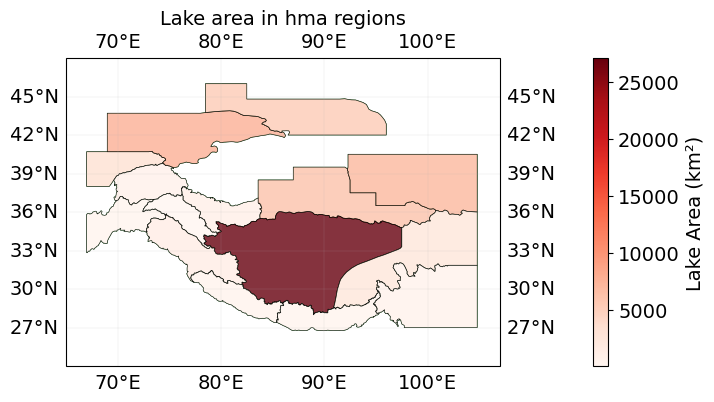

In [66]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([65.0, 107.0, 24.0, 46.0])
## add region boundaries
hma_gdf.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.3)
### add lake statistics
hma_region_lake_stats.plot(ax=ax, 
                         column='lake_area', 
                         cmap='Reds', 
                         legend=True,
                         legend_kwds={'label': "Lake Area (km²)", 'shrink': 0.5, 'pad': 0.15},
                         edgecolor='black', 
                         linewidth=0.5, 
                         alpha=0.8)
## add auxiliary features
ax.gridlines(draw_labels=True, linewidth=0.2, alpha=0.5, zorder=1)
ax.set_title('Lake area in hma regions', fontsize=14)
# fig.savefig('figures/water-extent/hma_basin_lake_area_map.png', dpi=200, bbox_inches='tight')


Text(0.5, 1.0, 'Lake number in hma regions')

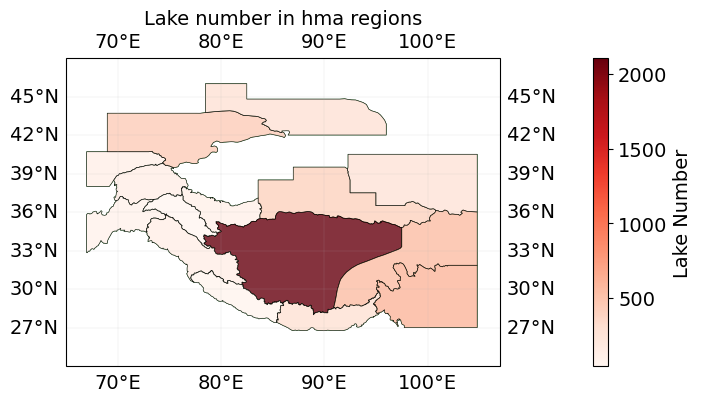

In [59]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([65.0, 107.0, 24.0, 46.0])
## add region boundaries
hma_gdf.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.3)
### add lake statistics
hma_region_lake_stats.plot(ax=ax, 
                         column='lake_number', 
                         cmap='Reds', 
                         legend=True,
                         legend_kwds={'label': "Lake Number", 'shrink': 0.5, 'pad': 0.15},
                         edgecolor='black', 
                         linewidth=0.5, 
                         alpha=0.8)
## add auxiliary features
ax.gridlines(draw_labels=True, linewidth=0.2, alpha=0.5, zorder=1)
ax.set_title('Lake number in hma regions', fontsize=14)
# fig.savefig('figures/water-extent/hma_region_lake_number_map.png', dpi=200, bbox_inches='tight')


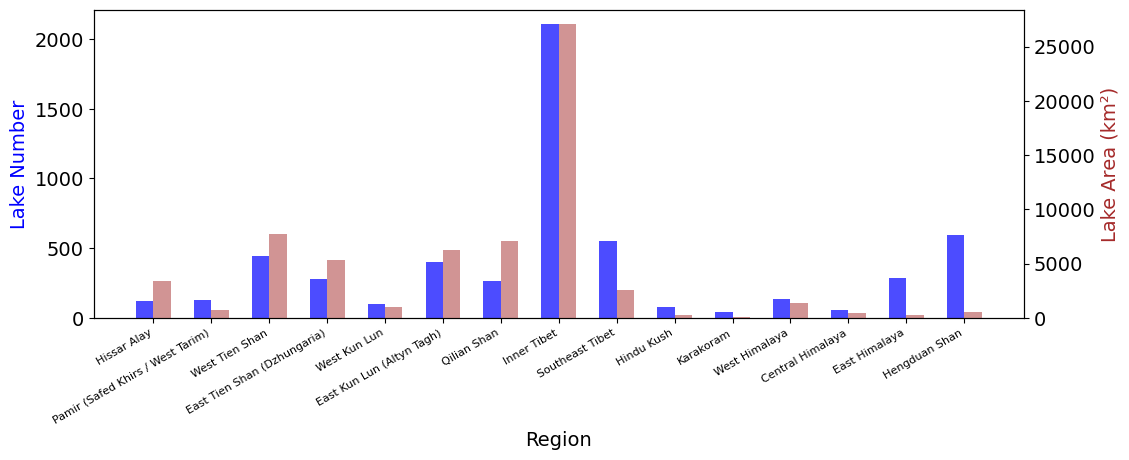

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x=hma_region_lake_stats.index, 
       height=hma_region_lake_stats['lake_number'], 
       width=0.3, 
       color='blue', 
       alpha=0.7)
ax2 = ax.twinx()
ax2.bar(x=hma_region_lake_stats.index+0.3, 
        height=hma_region_lake_stats['lake_area'], 
        width=0.3, 
        color='Brown', 
        alpha=0.5)
ax.set_xticks(hma_region_lake_stats.index + 0.15)
ax.set_xticklabels(hma_region_lake_stats['full_name'], rotation=30, ha='right', fontsize=8)
ax.set_xlabel('Region')
ax.set_ylabel('Lake Number', color='blue')
ax2.set_ylabel('Lake Area (km²)', color='Brown')
# fig.savefig('figures/water-extent/hma_region_lake_stat_bar.png', dpi=200, bbox_inches='tight')
